In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape


(400, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
from sklearn.preprocessing import Binarizer

In [7]:
bi =  Binarizer(threshold=0.75)
df['Chance of Admit']=bi.fit_transform(df[['Chance of Admit']])
df.head()


KeyError: "None of [Index(['Chance of Admit'], dtype='object')] are in the [columns]"

In [8]:
bi =  Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [10]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [11]:
y = y.astype(int)


<Axes: xlabel='Chance of Admit ', ylabel='count'>

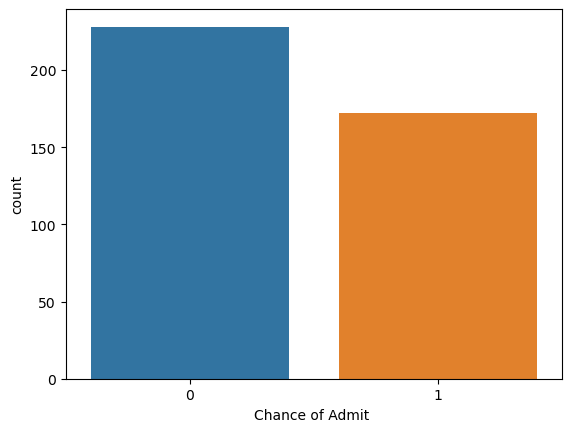

In [12]:
sns.countplot(x = y)

In [13]:
y.value_counts()


0    228
1    172
Name: Chance of Admit , dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [15]:
x_test.shape

(80, 8)

In [16]:
x_train.shape

(320, 8)

In [17]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
14,15,311,104,3,3.5,2.0,8.20,1
363,364,306,103,2,2.5,3.0,8.36,0
304,305,313,106,2,2.5,2.0,8.43,0
361,362,334,116,4,4.0,3.5,9.54,1


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
classifier = DecisionTreeClassifier(random_state=0)

In [21]:
classifier.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

In [22]:
y_pred = classifier.predict(x_test)


In [23]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [24]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
14,0,0
363,0,0
304,0,0
361,1,1


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

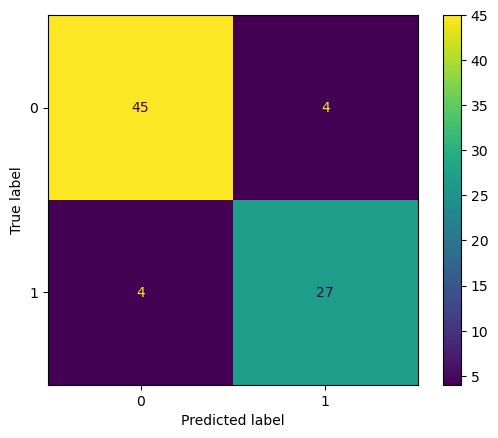

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [27]:
accuracy_score(y_test,y_pred)


0.9

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.87      0.87      0.87        31

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



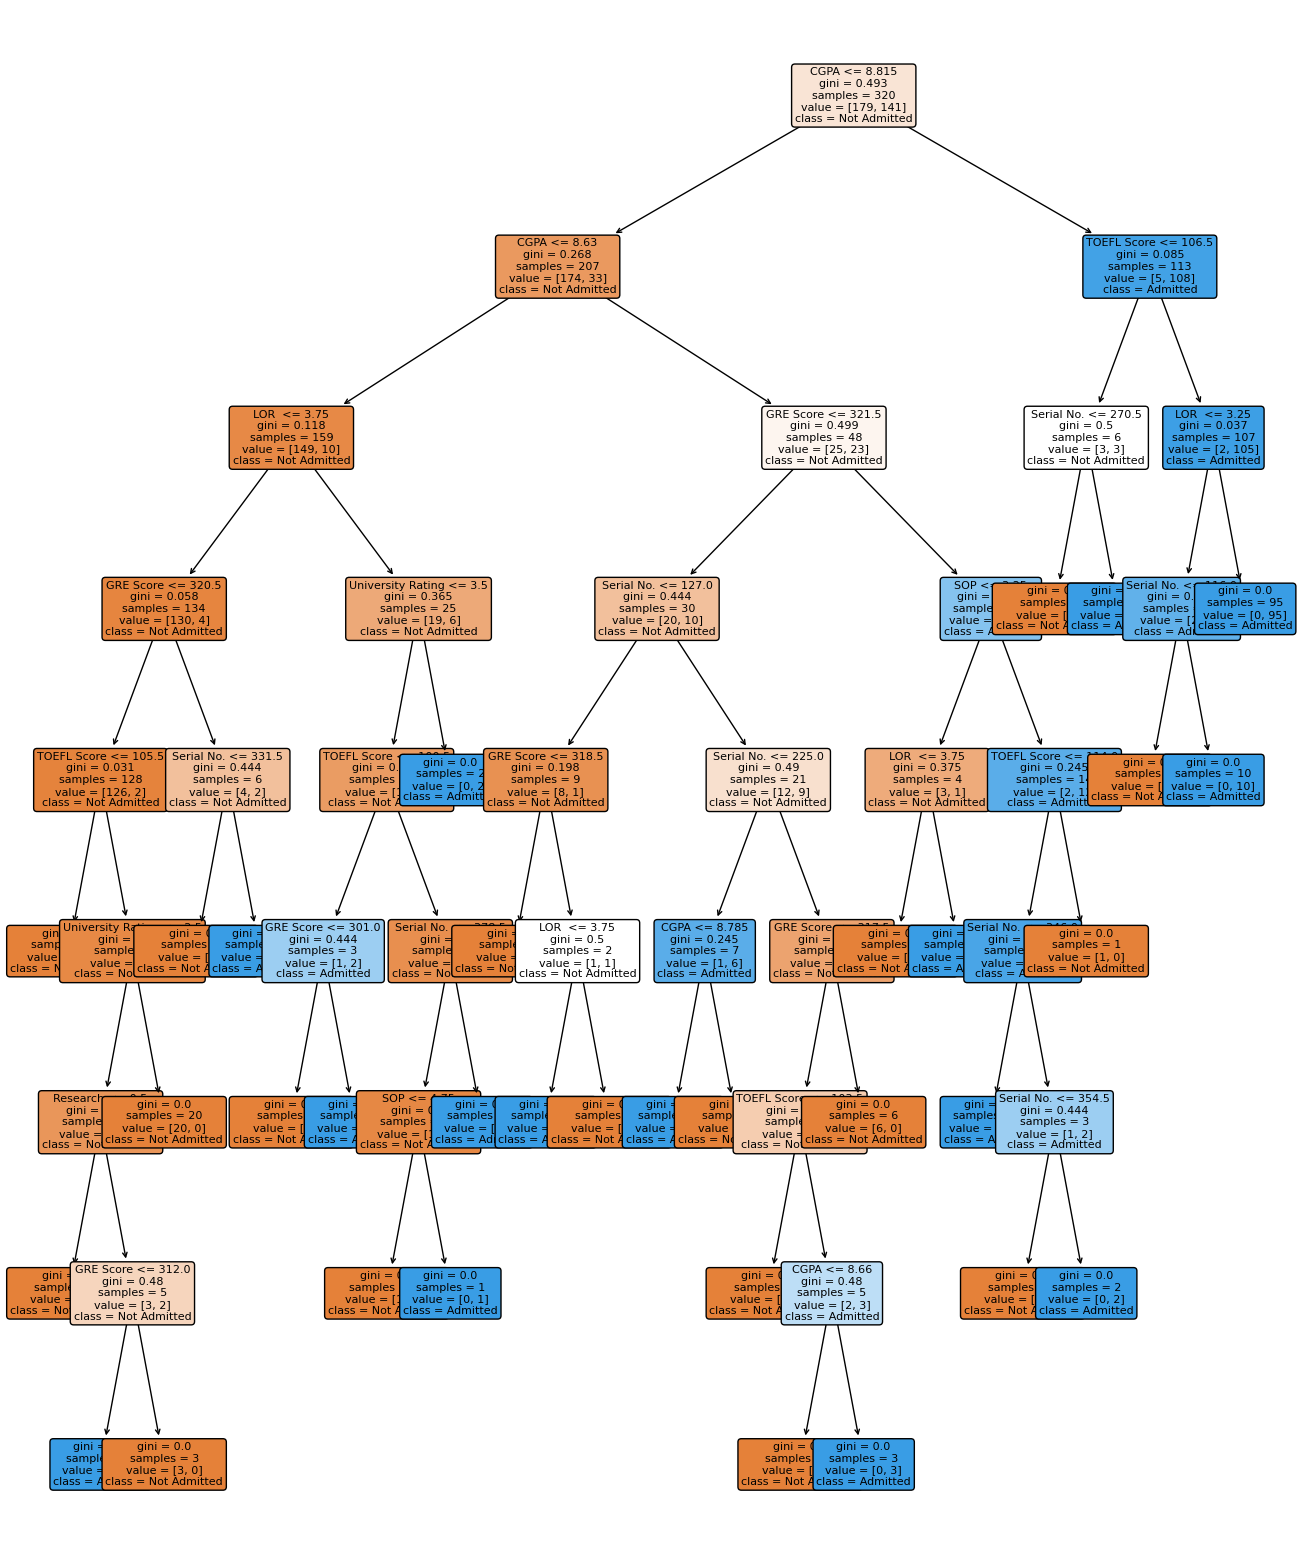

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,20))
plot_tree(classifier,fontsize=8, filled=True, rounded=True, 
          feature_names=x.columns.tolist(),
          class_names=['Not Admitted','Admitted']);

In [43]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 26.9 MB/s eta 0:00:00m eta 0:00:01:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.
